In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import math
import pandas as pd
import collections

**EM for Gaussian Mixture**

In [2]:
from scipy.stats import multivariate_normal

In [3]:
# Defining function which calculates posterior 
# probabilities for labels given a data point
# For the entire dataset
def post_prob(X,n_comp,means,list_covs,mix_coeff):
  Z_P=np.zeros(n_comp)
  gauss=np.zeros((X.shape[0],n_comp))
  for i in range(0,n_comp):
    gauss[:,i]=multivariate_normal.pdf(x=X,mean=means[i],cov=list_covs[i])
  
  prod=mix_coeff*gauss
  marg_x=np.sum(prod,axis=1)
  post_z_given_x=prod.T/marg_x
  post_z_given_x=post_z_given_x.T

  #Also calculating log probability density for all pairs of
  # datapoints and clusters as required
  log_prob=np.log(prod)

  return post_z_given_x, log_prob

In [4]:
# Defining Function which applies EM algorithm
def EM_for_Gaussian_Mixture(X,n_comps,n_iter,means=[],covs=[],coeffs=[],rand_init='Yes'):

  # Initialize Means
  if rand_init=='Yes':
    means=np.random.random((n_comps,2))*5
  # Initialize Co-variance Matrices
  if rand_init=='Yes':
    covs=[]
    for i in range(0,n_comps):
      covs.append(np.identity(X.shape[1]))
  # Initialize Mixture Coefficients
  if rand_init=='Yes':
    coeffs=np.random.random(n_comps)
    coeffs=(coeffs)/np.sum(coeffs)

  for i in range(0,n_iter):
    gamma_mat,log_prob=post_prob(X,n_comps,means,covs,coeffs)
    N_k=np.sum(gamma_mat,axis=0)
    means=gamma_mat.T@X
    means=means.T/N_k
    means=means.T
    for m in range(0, n_comps):
      covs[m]=  (( (gamma_mat[:,m])*((X-means[m]).T) ) @ (X-means[m]))/N_k[m]
    coeffs=N_k/(X.shape[0])
  labels=np.argmax(gamma_mat,axis=1)
  return means,covs,coeffs,gamma_mat,log_prob,labels

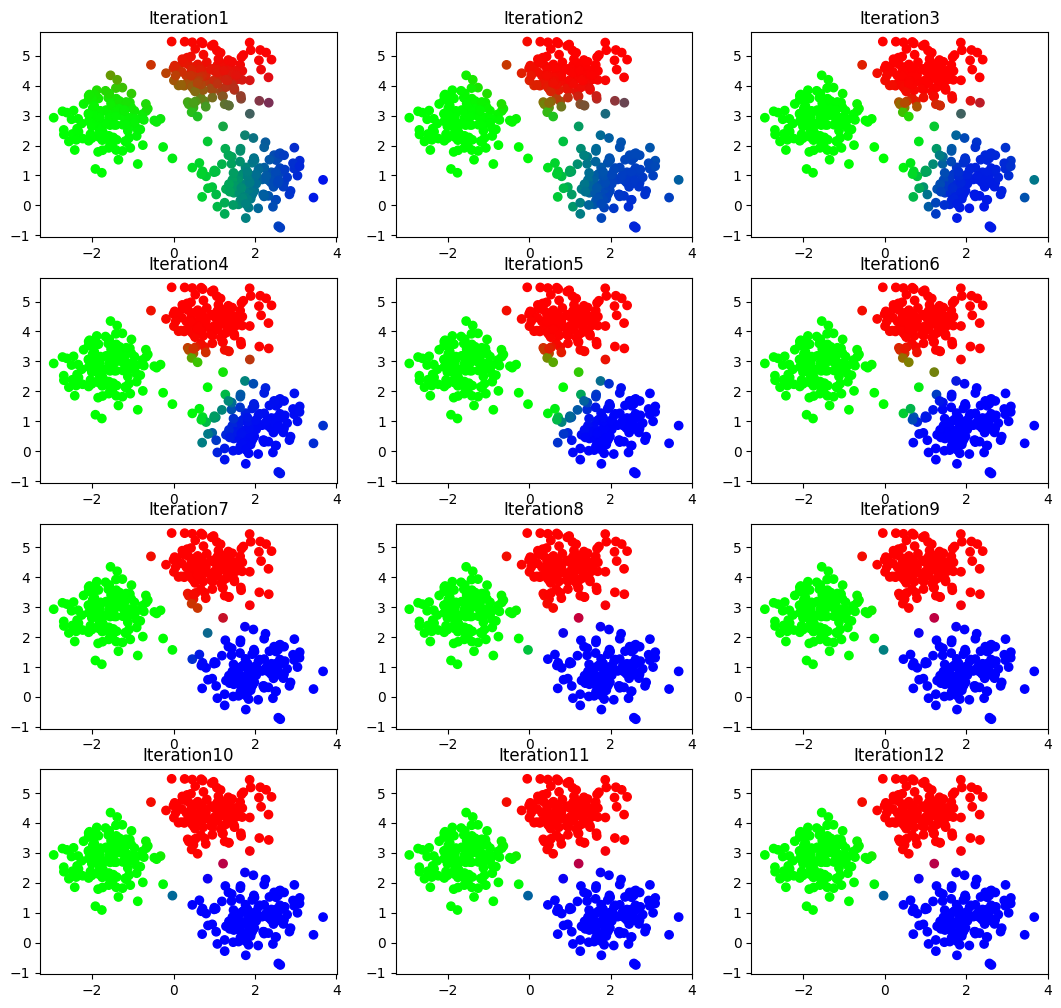

In [8]:
# Verifying Implementation of EM Algorithm
k=3
Xg, y_true = make_blobs(n_samples=400, centers=k,
                       cluster_std=0.60,random_state=0)

means=np.random.random((k,2))*5
covs=[]
for i in range(0,k):
  covs.append(np.identity(2))
coeffs=np.random.random(k)
coeffs=(coeffs)/np.sum(coeffs)

iterations=12

plt.figure(figsize=(13,25))
for i in range(0,iterations):
    means,covs,coeffs,post_prob_,log_prob,labels=EM_for_Gaussian_Mixture(
        Xg,k,1,means,covs,coeffs,rand_init='No')
    plt.subplot(8,3,i+1)
    plt.scatter(Xg[:,0],Xg[:,1],c=post_prob_)
    plt.title('Iteration'+str(i+1))

<ipython-input-16-9a24e6d44c41>:17: RuntimeWarning: divide by zero encountered in log
  log_prob=np.log(prod)


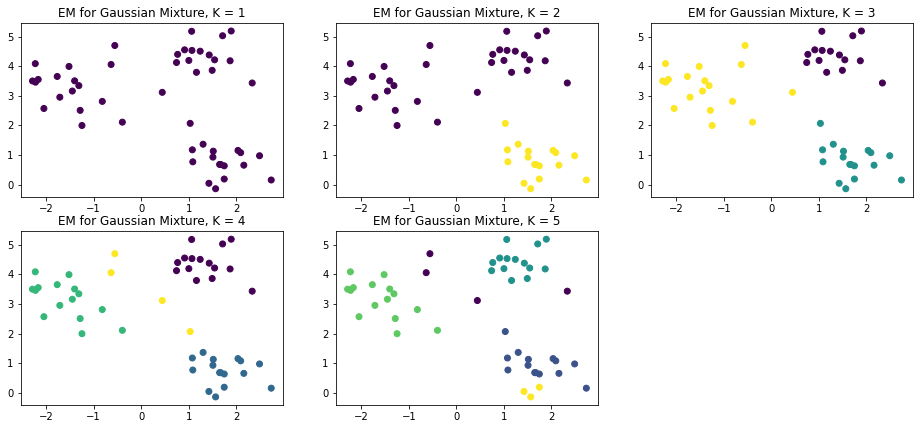

In [ ]:
# Running EM Algorithm
# For Different Values of K
K=[1,2,3,4,5]
Assignments=np.zeros((len(K),len(K)))
plt.figure(figsize=(16,30))
for j in range(0,len(K)): #Represents No. of Components Used
    
    means,covs,coeffs,post_prob_,log_prob,labels=EM_for_Gaussian_Mixture(X,K[j],200,rand_init='Yes')

    plt.subplot(8,3,j+1)
    plt.scatter(X[:,0],X[:,1],c=labels)
    plt.title('EM for Gaussian Mixture, K = '+str(j+1))

    count=collections.Counter(labels)
    P=np.array([count[x] for x in sorted(count.keys())])
    P=(P/(np.sum(P)))*100
    P=sorted(P,reverse=True)
    
    for k in range(0,len(P)):  # Represents kth Cluster
      Assignments[j,k]=P[k]   

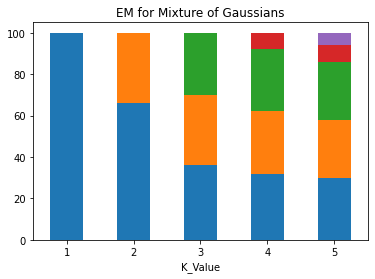

,CL1,CL2,Cl3,CL4,Cl5,K_Value
0,100.0,0.0,0.0,0.0,0.0,1
1,66.0,34.0,0.0,0.0,0.0,2
2,36.0,34.0,30.0,0.0,0.0,3
3,32.0,30.0,30.0,8.0,0.0,4
4,30.0,28.0,28.0,8.0,6.0,5


In [ ]:
# Computing Percentage of Points Assigned
# For each value of K
P=Assignments
Col=['CL1','CL2','Cl3','CL4','Cl5']
P=pd.DataFrame(data=P,columns=Col)
P['K_Value']=np.arange(1,6,1)
P.plot(x='K_Value',kind='bar',stacked=True,rot=1,legend=False)
plt.title('EM for Mixture of Gaussians')
plt.show()
display(P)